In [1]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
import tensorflow

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths

import numpy as np
import random
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data_train = np.load('Dataset5_raw_train.npz')
image_train, image_label_train = data_train['image'], data_train['image_label'].astype(np.uint8)
x_train = np.concatenate([image_train[:2326], image_train[2512:4838], image_train[6119:8445], image_train[12234:14560], image_train[16672:18998]])
y_train = np.concatenate([image_label_train[:2326], image_label_train[2512:4838], image_label_train[6119:8445], image_label_train[12234:14560], image_label_train[16672:18998]])

In [4]:
data_test = np.load('Dataset5_raw_test.npz')
image_test, image_label_test = data_test['image'].astype(np.float16), data_test['image_label'].astype(np.uint8)
x_test = np.concatenate([image_test[:838], image_test[839:1677], image_test[2043:2881], image_test[4083:4921], image_test[5564:6402]])
y_test = np.concatenate([image_label_test[:838], image_label_test[839:1677], image_label_test[2043:2881], image_label_test[4083:4921], image_label_test[5564:6402]])

MemoryError: Unable to allocate 7.33 GiB for an array with shape (984453120,) and data type float64

In [ ]:
data_val = np.load('Dataset5_raw_val.npz')
image_val, image_label_val = data_val['image'].astype(np.float16), data_val['image_label'].astype(np.uint8)
x_val = np.concatenate([image_val[:836], image_val[837:1673], image_val[2040:2876], image_val[4079:4915], image_val[5559:6395]])
y_val = np.concatenate([image_label_val[:836], image_label_val[837:1673], image_label_val[2040:2876], image_label_val[4079:4915], image_label_val[5559:6395]])

In [ ]:
#Combining
image_total = np.concatenate([x_train, x_test, x_val])
label_total = np.concatenate([y_train, y_test, y_val])
del x_train, x_test, x_val, y_train, y_test, y_val

MemoryError: Unable to allocate 5.61 GiB for an array with shape (20000, 224, 224, 3) and data type float16

In [ ]:
import tensorflow

X, X_test, y, y_test = train_test_split(image_total, label_total, train_size=0.8, random_state=42)
del image_train, image_label_train, image_test, image_label_test, image_val, image_label_val, image_total, label_total
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.75, random_state=42)
train_dataset = tensorflow.data.Dataset.from_tensor_slices((X_train, y_train))
del X_train, y_train
valid_dataset = tensorflow.data.Dataset.from_tensor_slices((X_valid, y_valid))
del X_valid, y_valid
test_dataset = tensorflow.data.Dataset.from_tensor_slices((X_test, y_test))
del X_test, y_test

MemoryError: Unable to allocate 3.36 GiB for an array with shape (12000, 224, 224, 3) and data type float16

In [12]:
#split the data into test and train
trainX, testX, trainY, testY = train_test_split(image_total, label_total, test_size=0.30, random_state=42)

In [10]:
#split the data into test and train
trainX, testX, trainY, testY = train_test_split(image_total, label_total, test_size=0.30, random_state=42)
del image_train, image_label_train, image_test, image_label_test, image_val, image_label_val, image_total, label_total, x_train, x_test, x_val, y_train, y_test, y_val

c:\Users\abdel\.conda\envs\tensorflow\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


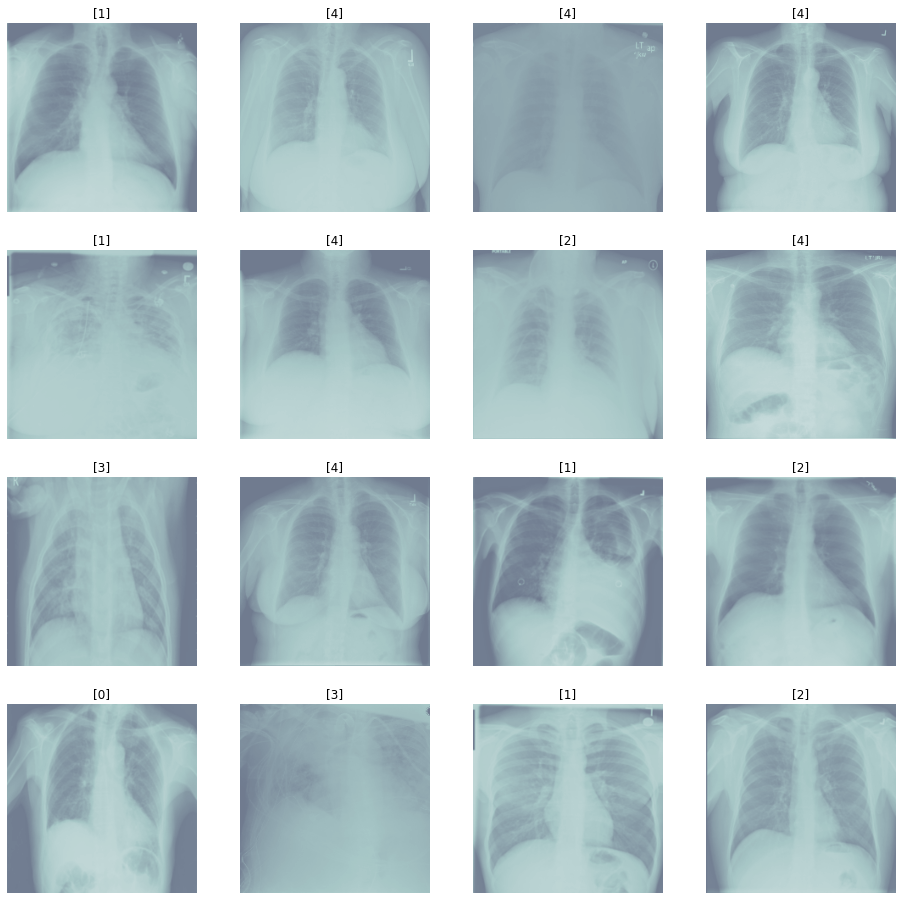

In [11]:
def plotImagesAndLabels():
    all_labels = np.unique(trainY)
    t_x, t_y = trainX, trainY
    fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
    for (c_x, c_y, c_ax) in zip(t_x, t_y, m_axs.flatten()):
        #print([n_class for n_class, n_score in zip(all_labels, c_y) if n_score>0.5])
        c_ax.imshow(c_x[:,:,0], cmap = 'bone', vmin = -1.5, vmax = 1.5)
        c_ax.set_title(c_y)
        c_ax.axis('off')
plotImagesAndLabels()

In [12]:
#set the parameters
bs = 16
lr = 0.0001
size = (224, 224)
shape = (224,224, 3) 
epochs = 15
class_number = 5

#define the model by mobilenetv2
def MobileNetV2_model(input_shape, class_number):
    baseModel = MobileNetV2(include_top=False, input_tensor=Input(shape=input_shape))
    for layer in baseModel.layers[:-4]:
        layer.trainable = False
    #baseModel.summary()
    model = Sequential()
    model.add(baseModel)
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_number, activation='softmax'))
    return model

#compile model
model = MobileNetV2_model(shape,class_number)
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [13]:
#start the train
# TO DO: ADDING EARLY STOPPING
print("[INFO] training ...")
H = model.fit(trainX, trainY, batch_size=bs, 
            validation_data=(testX, testY),	
            epochs=epochs)

[INFO] training ...
Epoch 1/15
875/875 [==============================] - 98s 96ms/step - loss: 1.3047 - accuracy: 0.5201 - val_loss: 0.6799 - val_accuracy: 0.7613
Epoch 2/15
448/875 [==============>...............] - ETA: 24s - loss: 0.7170 - accuracy: 0.7607

KeyboardInterrupt: 

In [32]:
from sklearn.metrics import accuracy_score
import time
start_time = time.time()
y_pred = model.predict(testX)
preds = np.argmax(y_pred, axis=1)
testY = testY.reshape(6000, )
acc = accuracy_score(testY, preds)
end_time = time.time()
print(f'time taken: {end_time - start_time}, accuracy: {acc}')

time taken: 15.038289546966553, accuracy: 0.9158333333333334


In [65]:
import random
def predict_sample(model, X_test, y_test):
    indx = random.randint(0, len(y_test))
    X = X_test[indx]
    X = X.reshape(1, 224, 224, 3)
    y_true = y_test[indx]
    y_pred = model.predict(X)
    pred = np.argmax(y_pred, axis=1)
    print(f'percentage: {(pred[0] == y_true).sum()*100}%')
    print(y_true, pred[0])


predict_sample(model, testX, testY)

percentage: 100%
4 4


In [ ]:
# Loading
data_train = np.load('Dataset5_raw_train.npz')
data_test = np.load('Dataset5_raw_test.npz')
data_val = np.load('Dataset5_raw_val.npz')

image_train, image_label_train = data_train['image'].astype(np.float16)/ 255.0, data_train['image_label'].astype(np.int8)
image_test, image_label_test = data_test['image'].astype(np.float16)/ 255.0, data_test['image_label'].astype(np.int8)
image_val, image_label_val = data_val['image'].astype(np.float16)/ 255.0, data_val['image_label'].astype(np.int8)

#Combining
image_total = np.concatenate([image_val, image_test, image_train])
label_total = np.concatenate([image_label_val, image_label_test, image_label_train])

## TO DO: Creating functions

#split the data into test and train
#trainX, testX, trainY, testY = train_test_split(image_total, label_total, test_size=0.20, random_state=42)
del image_train, image_label_train, image_test, image_label_test, image_val, image_label_val, 

In [12]:
#plot a traning loss and accuracy
N = 20
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

NameError: name 'H' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
uniqueColumns, occurCount = np.unique(label_total, axis=0, return_counts=True)
uniqueColumns, occurCount

(array([[0],
        [1],
        [2],
        [3],
        [4]], dtype=int8),
 array([ 4186,  6012, 10192,  7397,  4897], dtype=int64))

In [ ]:
image_total.shape

(32684, 224, 224, 3)